In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy import stats 
import seaborn as sns

In [2]:
df=pd.read_csv(r'Downloads/D1.csv',parse_dates=['survey_date'])

In [3]:
df.survey_date.dtype

dtype('<M8[ns]')

In [4]:
df.set_index('survey_date',inplace=True)

In [5]:
from scipy.stats import skew
import pylab as p 
print(df.skew())


ip_latitude               -2.087471
ip_longitude               1.652506
ip_accuracy                3.157092
age                       10.085116
height                    -0.444816
weight                     1.203467
bmi                        2.205616
contacts_count             1.001026
house_count                1.777352
public_transport_count     6.091561
worried                   -0.301183
covid19_positive           0.557063
covid19_symptoms           2.354682
covid19_contact            2.369179
asthma                     2.284441
kidney_disease             7.964242
liver_disease             10.175924
compromised_immune         3.605102
heart_disease              4.768362
lung_disease               6.159167
diabetes                   2.988074
hiv_positive              15.508909
hypertension               1.652573
other_chronic              3.341092
nursing_home              10.401023
health_worker              3.653815
risk_infection             0.406947
risk_mortality            13

In [6]:
df.isnull().sum()


region                    3626
country                      2
ip_latitude                  0
ip_longitude                 0
ip_accuracy                  0
sex                          0
age                          0
height                       0
weight                       0
bmi                          0
blood_type                   0
insurance                 1168
income                    1168
race                      1168
immigrant                 1168
smoking                     39
contacts_count              46
house_count                  0
public_transport_count    1168
working                     46
worried                   1168
covid19_positive             0
covid19_symptoms             0
covid19_contact              0
asthma                       0
kidney_disease               0
liver_disease                0
compromised_immune           0
heart_disease                0
lung_disease                 0
diabetes                     0
hiv_positive                 0
hyperten

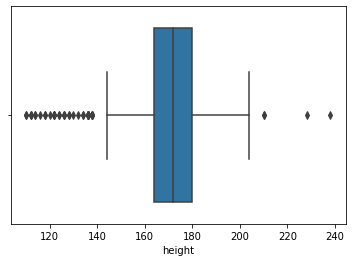

In [7]:
mx=sns.boxplot(df['height'])

In [8]:
df['height'].where(df['height']<10).unique()

array([nan])

In [9]:
df['height'].value_counts()

178    377
168    370
164    356
172    353
174    353
170    339
176    319
166    302
184    275
182    262
162    255
180    254
160    176
186    175
158    174
188    149
154    130
156    127
190     84
192     58
152     44
194     42
150     29
196     18
198     12
148     11
136     10
144      7
146      6
200      5
138      5
122      4
112      3
204      3
126      3
124      2
128      2
110      2
210      2
114      2
118      2
134      2
228      1
130      1
132      1
202      1
120      1
116      1
238      1
Name: height, dtype: int64

In [10]:
df[df['covid19_positive']==1].groupby('country')['bmi'].mean()['US']

30.89091653027822

In [11]:
df.groupby('country')['risk_mortality'].mean().sort_values()

country
KE     0.050000
FI     0.056333
BH     0.062500
QA     0.064000
MZ     0.073000
        ...    
NZ     3.143556
AM     3.291000
PT     3.603583
AD     3.994000
IT    10.031844
Name: risk_mortality, Length: 90, dtype: float64

In [12]:
df.columns

Index(['region', 'country', 'ip_latitude', 'ip_longitude', 'ip_accuracy',
       'sex', 'age', 'height', 'weight', 'bmi', 'blood_type', 'insurance',
       'income', 'race', 'immigrant', 'smoking', 'contacts_count',
       'house_count', 'public_transport_count', 'working', 'worried',
       'covid19_positive', 'covid19_symptoms', 'covid19_contact', 'asthma',
       'kidney_disease', 'liver_disease', 'compromised_immune',
       'heart_disease', 'lung_disease', 'diabetes', 'hiv_positive',
       'hypertension', 'other_chronic', 'nursing_home', 'health_worker',
       'risk_infection', 'risk_mortality'],
      dtype='object')

In [13]:
second=df[df['covid19_positive']==1].groupby('country')['covid19_positive'].count()

In [14]:
second

country
AE       2
AM       1
AR       6
AT       1
AU       9
      ... 
TH       1
TR       3
UA       1
US    1222
ZA      17
Name: covid19_positive, Length: 67, dtype: int64

In [15]:
for index,value in second.items():
    if (value>9):
        print(index)

BE
BR
CA
CL
ES
GB
IN
IT
MX
PK
US
ZA


In [16]:
#Top 5 countries with highes positive cases: US BR GB CA IT#
second.sort_values(ascending=False).head(5)

country
US    1222
BR     154
GB     127
CA      51
IT      32
Name: covid19_positive, dtype: int64

In [17]:
#Task 3: 
#First we can see that the computer is misunderstanding 'NA' region for NaN value, we need to double check that
df['region'].unique()

array([nan, 'EU', 'SA', 'OC', 'AS', 'AF'], dtype=object)

In [18]:
#refill with string so that computer will regconize 
df['region'].fillna('NA', inplace=True)
df['region'].unique()

array(['NA', 'EU', 'SA', 'OC', 'AS', 'AF'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F14E76548>],
      dtype=object)

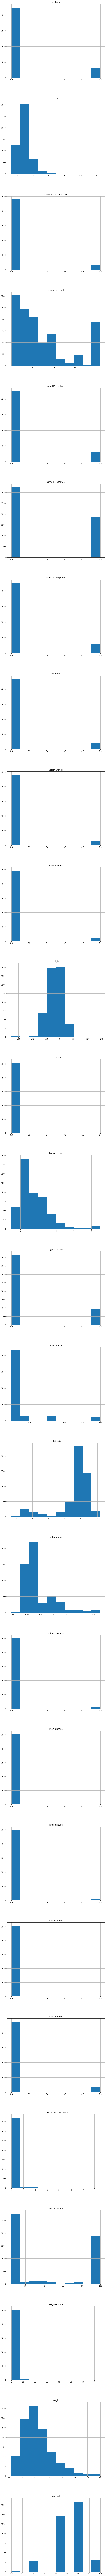

In [19]:
df.hist(figsize=[10,310], layout=[31,1])

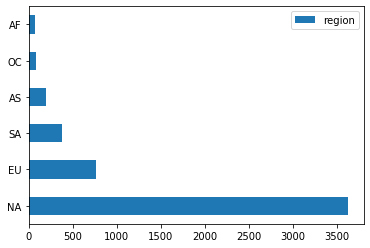

In [20]:
df['region'].value_counts().plot(kind='barh',legend=True)

In [21]:
df.isnull().sum()

region                       0
country                      2
ip_latitude                  0
ip_longitude                 0
ip_accuracy                  0
sex                          0
age                          0
height                       0
weight                       0
bmi                          0
blood_type                   0
insurance                 1168
income                    1168
race                      1168
immigrant                 1168
smoking                     39
contacts_count              46
house_count                  0
public_transport_count    1168
working                     46
worried                   1168
covid19_positive             0
covid19_symptoms             0
covid19_contact              0
asthma                       0
kidney_disease               0
liver_disease                0
compromised_immune           0
heart_disease                0
lung_disease                 0
diabetes                     0
hiv_positive                 0
hyperten

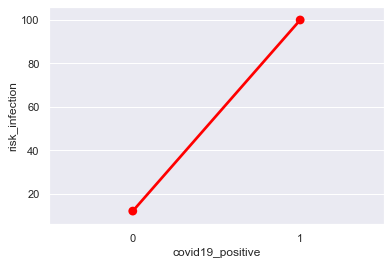

In [22]:
sns.set(style="darkgrid")
ax = sns.pointplot(x="covid19_positive", y="risk_infection", data=df, color='red')

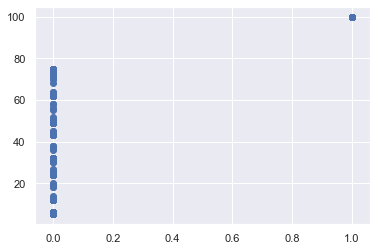

In [23]:
plt.scatter(df['covid19_positive'],df['risk_infection'])

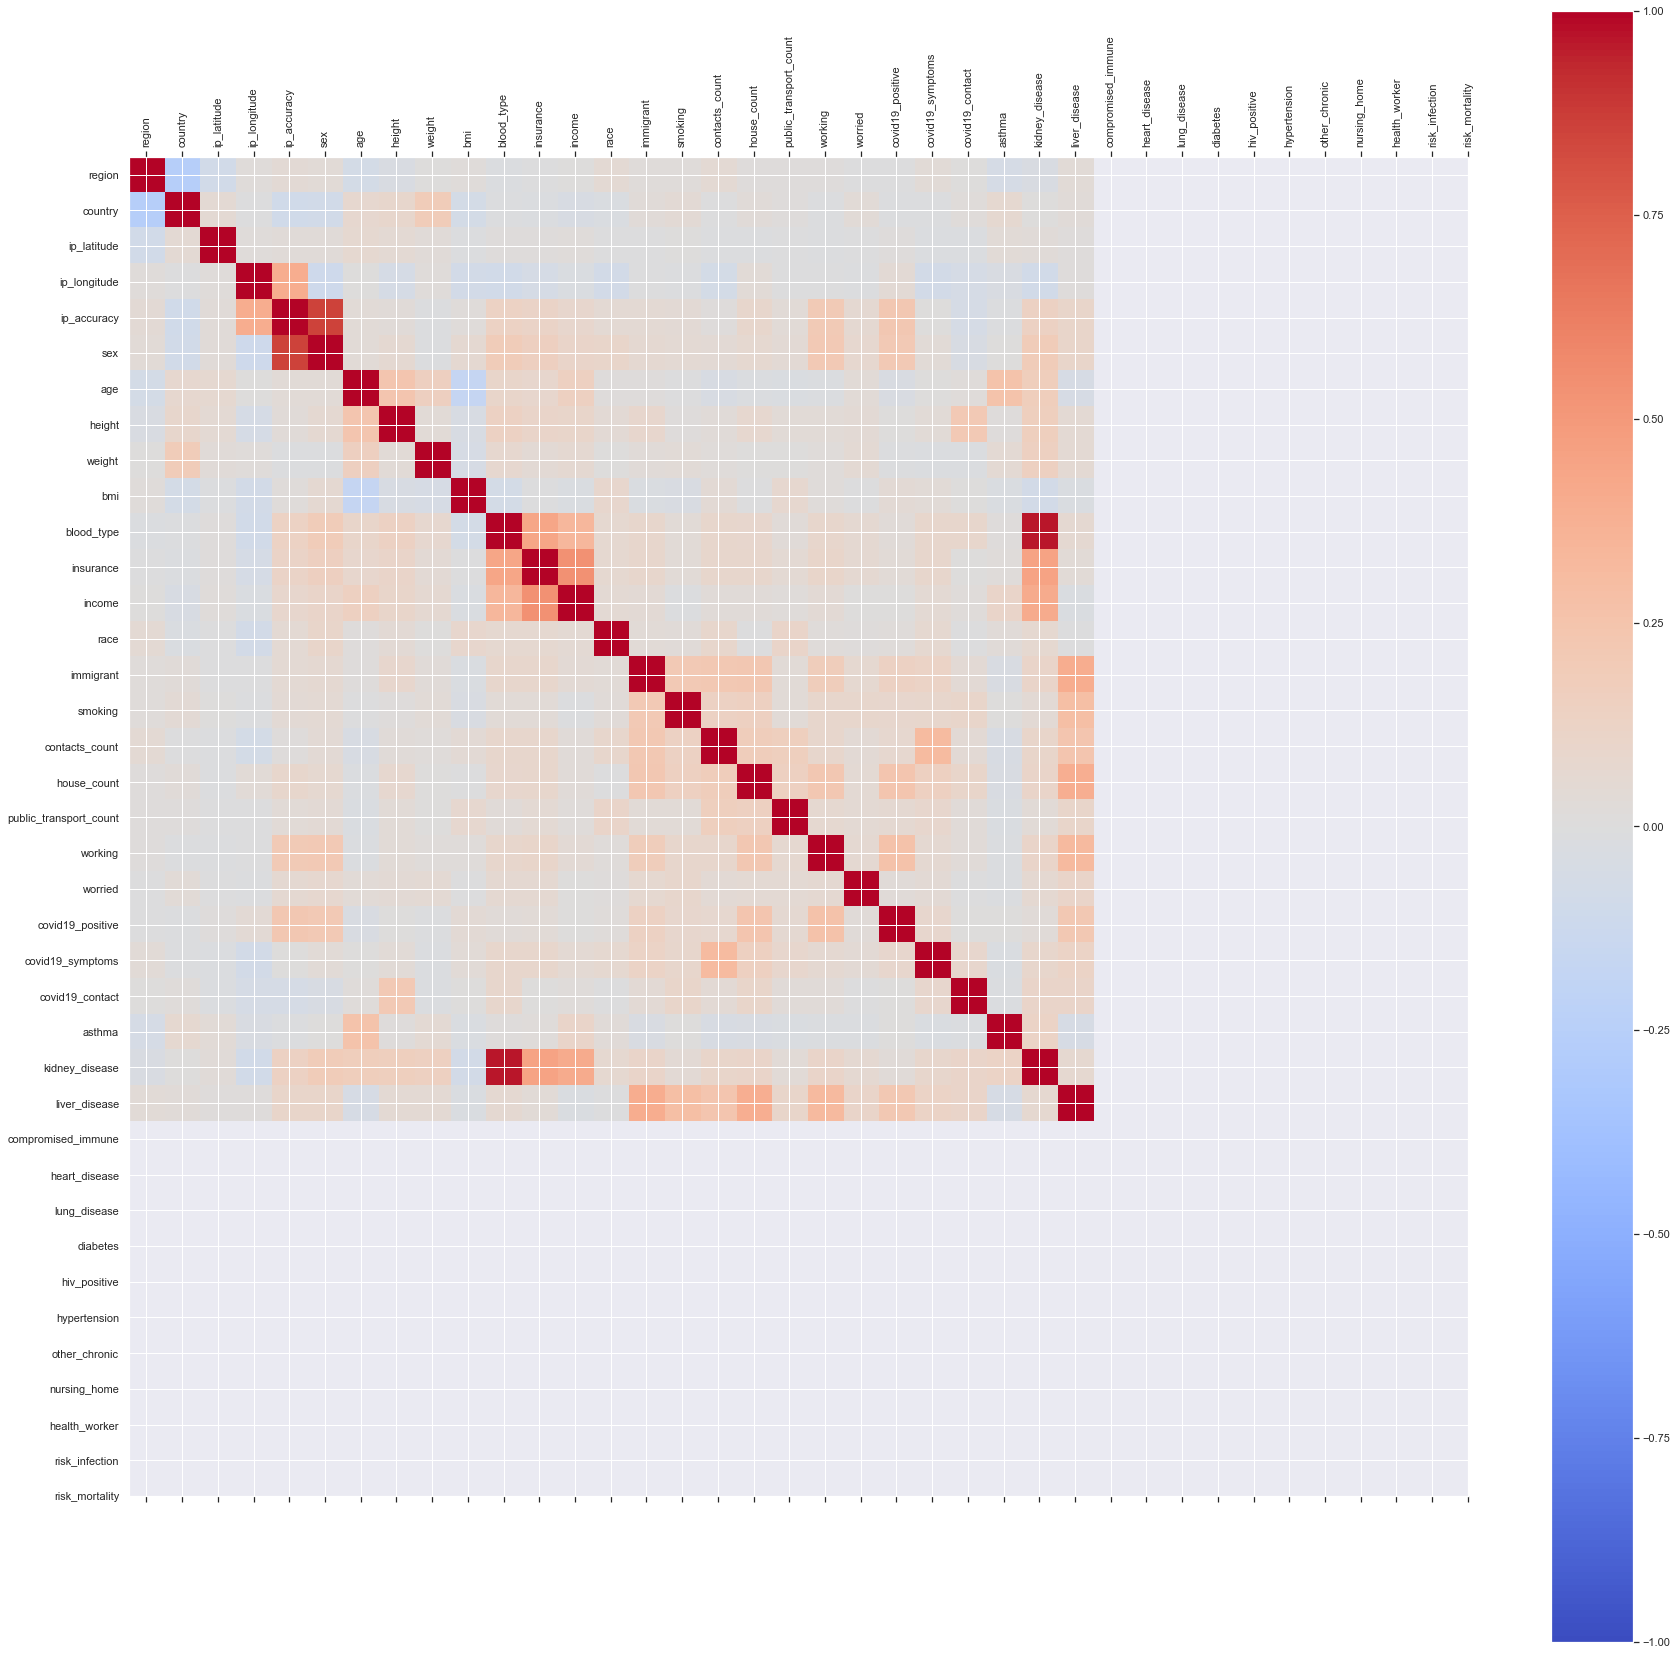

In [24]:
corr = df.corr()
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111) 
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1) 
ax.set_xticks(ticks) 
plt.xticks(rotation=90) 
ax.set_yticks(ticks) 
ax.set_xticklabels(df.columns) 
ax.set_yticklabels(df.columns) 
plt.show()

In [25]:
df['age_min']=df['age'].apply(lambda x: int(x.split('_')[0]))

In [26]:
df['age_max']=df['age'].apply(lambda x: int(x.split('_')[1]))

In [27]:
df.drop(['age'],axis=1)

region country  ip_latitude  ip_longitude  ip_accuracy     sex  \
survey_date                                                                  
2020-03-25      NA      US      33.9031     -118.1494          500    male   
2020-03-26      EU      NL      52.0218        4.5357            5  female   
2020-03-28      SA      BR     -26.8740      -48.7028           10  female   
2020-03-27      EU      CH      47.1921        8.1766           20    male   
2020-03-27      NA      US      40.5733     -111.9107            5    male   
...            ...     ...          ...           ...          ...     ...   
2020-07-07      NA      US      32.2146     -110.7915            5  female   
2020-07-07      NA      CA      43.5832      -79.3910            1    male   
2020-08-07      NA      US      30.5336      -97.7256            1    male   
2020-06-07      NA      US      39.8837      -75.3197            5    male   
2020-08-07      NA      US      47.6375     -122.2305           10  female   

             height  weight   bmi blood_type  ... diabetes hiv_positive  \
survey_date                                   ...                         
2020-03-25      184      80  23.6    unknown  ...        0            0   
2020-03-26      164      84  31.2    unknown  ...        0            0   
2020-03-28      170      64  22.1         ap  ...        0            0   
2020-03-27      132     124  71.1         op  ...        0            1   
2020-03-27      184     118  34.8         op  ...        1            0   
...             ...     ...   ...        ...  ...      ...          ...   
2020-07-07      166      66  23.9         op  ...        0            0   
2020-07-07      168      70  24.8         bp  ...        0            0   
2020-08-07      182      82  24.7         op  ...        0            0   
2020-06-07      184      80  23.6    unknown  ...        0            0   
2020-08-07      172      66  22.3         ap  ...        0            0   

            hypertension other_chronic nursing_home  health_worker  \
survey_date                                                          
2020-03-25             0             0            0              0   
2020-03-26             1             0            0              0   
2020-03-28             0             0            0              0   
2020-03-27             0             0            0              0   
2020-03-27             1             1            0              0   
...                  ...           ...          ...            ...   
2020-07-07             0             0            0              0   
2020-07-07             0             0            0              0   
2020-08-07             1             0            0              0   
2020-06-07             0             0            0              0   
2020-08-07             0             0            0              0   

             risk_infection  risk_mortality age_min  age_max  
survey_date                                                   
2020-03-25            100.0           0.194      50       60  
2020-03-26            100.0           3.483      80       90  
2020-03-28            100.0           0.050      20       30  
2020-03-27            100.0          13.973      90      100  
2020-03-27            100.0           0.116      30       40  
...                     ...             ...     ...      ...  
2020-07-07              5.0           1.496      70       80  
2020-07-07              5.0           3.510      70       80  
2020-08-07              5.0           2.171      70       80  
2020-06-07              5.0           0.557      50       60  
2020-08-07              5.0           0.050      30       40  

[5111 rows x 39 columns]

In [28]:
df['avg_age']=(df['age_max']+df['age_min'])/2


In [29]:
df.columns

Index(['region', 'country', 'ip_latitude', 'ip_longitude', 'ip_accuracy',
       'sex', 'age', 'height', 'weight', 'bmi', 'blood_type', 'insurance',
       'income', 'race', 'immigrant', 'smoking', 'contacts_count',
       'house_count', 'public_transport_count', 'working', 'worried',
       'covid19_positive', 'covid19_symptoms', 'covid19_contact', 'asthma',
       'kidney_disease', 'liver_disease', 'compromised_immune',
       'heart_disease', 'lung_disease', 'diabetes', 'hiv_positive',
       'hypertension', 'other_chronic', 'nursing_home', 'health_worker',
       'risk_infection', 'risk_mortality', 'age_min', 'age_max', 'avg_age'],
      dtype='object')

In [30]:
df.age_min.unique()

array([ 50,  80,  20,  90,  30,  40,  60,  10,  70,   0, 100], dtype=int64)

In [31]:
np.sort(df.avg_age.unique())

array([  5.,  15.,  25.,  35.,  45.,  55.,  65.,  75.,  85.,  95., 105.])

In [32]:
df.isnull().sum()

region                       0
country                      2
ip_latitude                  0
ip_longitude                 0
ip_accuracy                  0
sex                          0
age                          0
height                       0
weight                       0
bmi                          0
blood_type                   0
insurance                 1168
income                    1168
race                      1168
immigrant                 1168
smoking                     39
contacts_count              46
house_count                  0
public_transport_count    1168
working                     46
worried                   1168
covid19_positive             0
covid19_symptoms             0
covid19_contact              0
asthma                       0
kidney_disease               0
liver_disease                0
compromised_immune           0
heart_disease                0
lung_disease                 0
diabetes                     0
hiv_positive                 0
hyperten

In [33]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


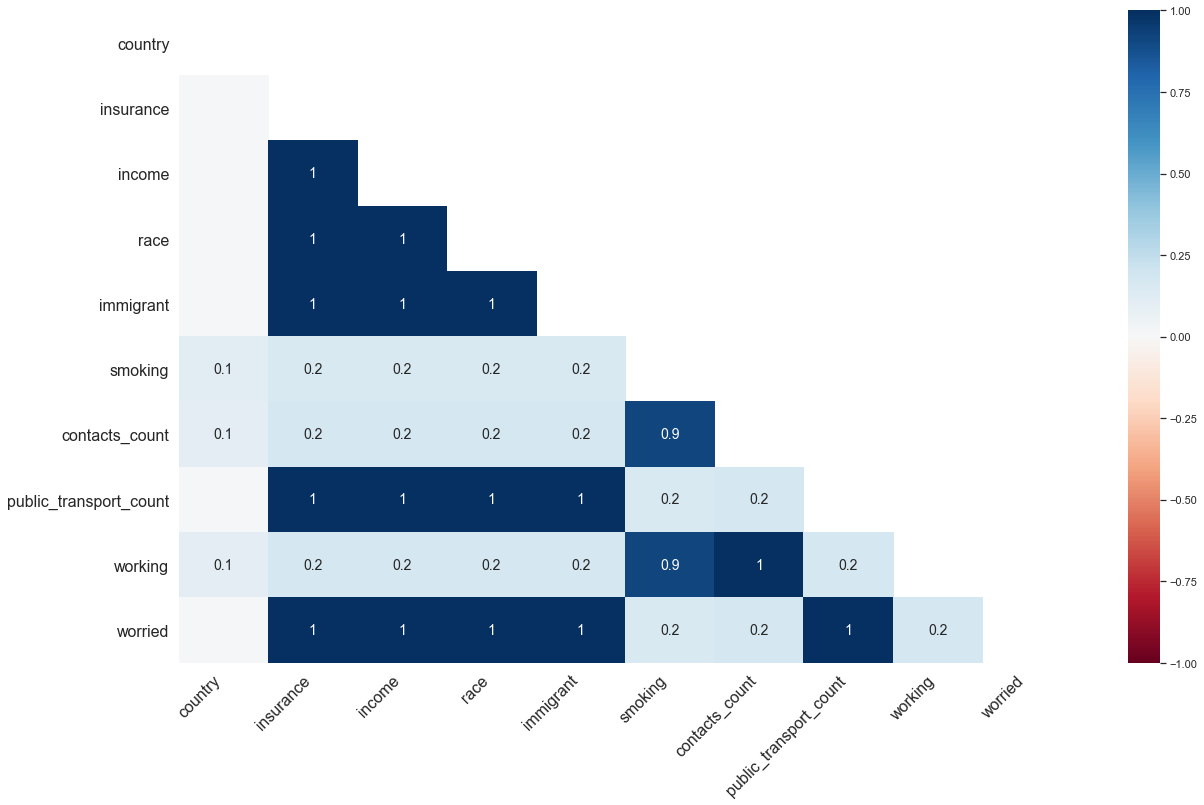

In [34]:
import missingno as msno
msno.heatmap(df)

In [35]:
from numpy import random


In [36]:
def fill_dummy_values(df, scaling_factor=0.075):
  df_dummy = df.copy(deep=True)
  for col_name in df_dummy:
    col = df_dummy[col_name]
    col_null = col.isnull()    
    # Calculate number of missing values in column 
    num_nulls = col_null.sum()
    # Calculate column range
    col_range = col.max() - col.min()
    # Scale the random values to scaling_factor times col_range
    dummy_values = (random.rand(num_nulls) - 2) * scaling_factor * col_range + col.min()
    col[col_null] = dummy_values
  return df_dummy

In [37]:
df.groupby(['height'])['smoking'].count()

height
110      2
112      3
114      2
116      1
118      2
120      1
122      4
124      2
126      3
128      2
130      1
132      1
134      2
136     10
138      5
144      7
146      6
148     11
150     29
152     44
154    130
156    127
158    173
160    176
162    255
164    352
166    302
168    370
170    338
172    350
174    349
176    316
178    374
180    249
182    258
184    269
186    172
188    149
190     84
192     56
194     42
196     18
198     12
200      5
202      1
204      3
210      2
228      1
238      1
Name: smoking, dtype: int64

In [38]:
df.groupby(['age_max','age_min'])['smoking'].count()

age_max  age_min
10       0            12
20       10          135
30       20          754
40       30         1228
50       40          964
60       50          774
70       60          657
80       70          394
90       80          111
100      90           38
110      100           5
Name: smoking, dtype: int64

In [39]:
df.region.unique()

array(['NA', 'EU', 'SA', 'OC', 'AS', 'AF'], dtype=object)

In [40]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [41]:
new_df=df.interpolate(method="time")

In [42]:
df.ip_latitude.dtype

dtype('float64')

In [43]:
new_df.loc[new_df['ip_latitude'] == 51.5875]

region country  ip_latitude  ip_longitude  ip_accuracy   sex  \
survey_date                                                                
2020-03-25      NA      US      51.5875       -0.1807           50  male   

               age  height  weight   bmi  ... hiv_positive hypertension  \
survey_date                               ...                             
2020-03-25   50_60     172      96  32.4  ...            0            1   

            other_chronic nursing_home health_worker risk_infection  \
survey_date                                                           
2020-03-25              0            0             0          100.0   

             risk_mortality  age_min  age_max avg_age  
survey_date                                            
2020-03-25              0.5       50       60    55.0  

[1 rows x 41 columns]

In [44]:
new_df['contacts_count'].head(5)

survey_date
2020-03-25     1.0
2020-03-26     1.0
2020-03-28    10.0
2020-03-27     1.0
2020-03-27     1.0
Name: contacts_count, dtype: float64

In [45]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [75]:
import folium
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamen Terrain')
for lat,lon,value,name in zip(df['ip_latitude'],df['ip_longitude'],df['height'],df['country']):
    folium.CircleMarker(location=[lat,lon],radius=value*0.03,popup=('<strong>State</strong>: '+str(name).capitalize()),fill=True,fill_opacity=0.1).add_to(map)

In [76]:
map

In [77]:
from sklearn.impute import KNNImputer

In [79]:
imputer=KNNImputer(n_neighbors=2)

####The mark
